## 파일 다운 링크
ftp://ita.ee.lbl.gov/html/contrib/NASA-HTTP.html

1. 파일 다운 후 다운된 파일을 열기

2. 빨간 동그라미 쳐진 링크 클릭
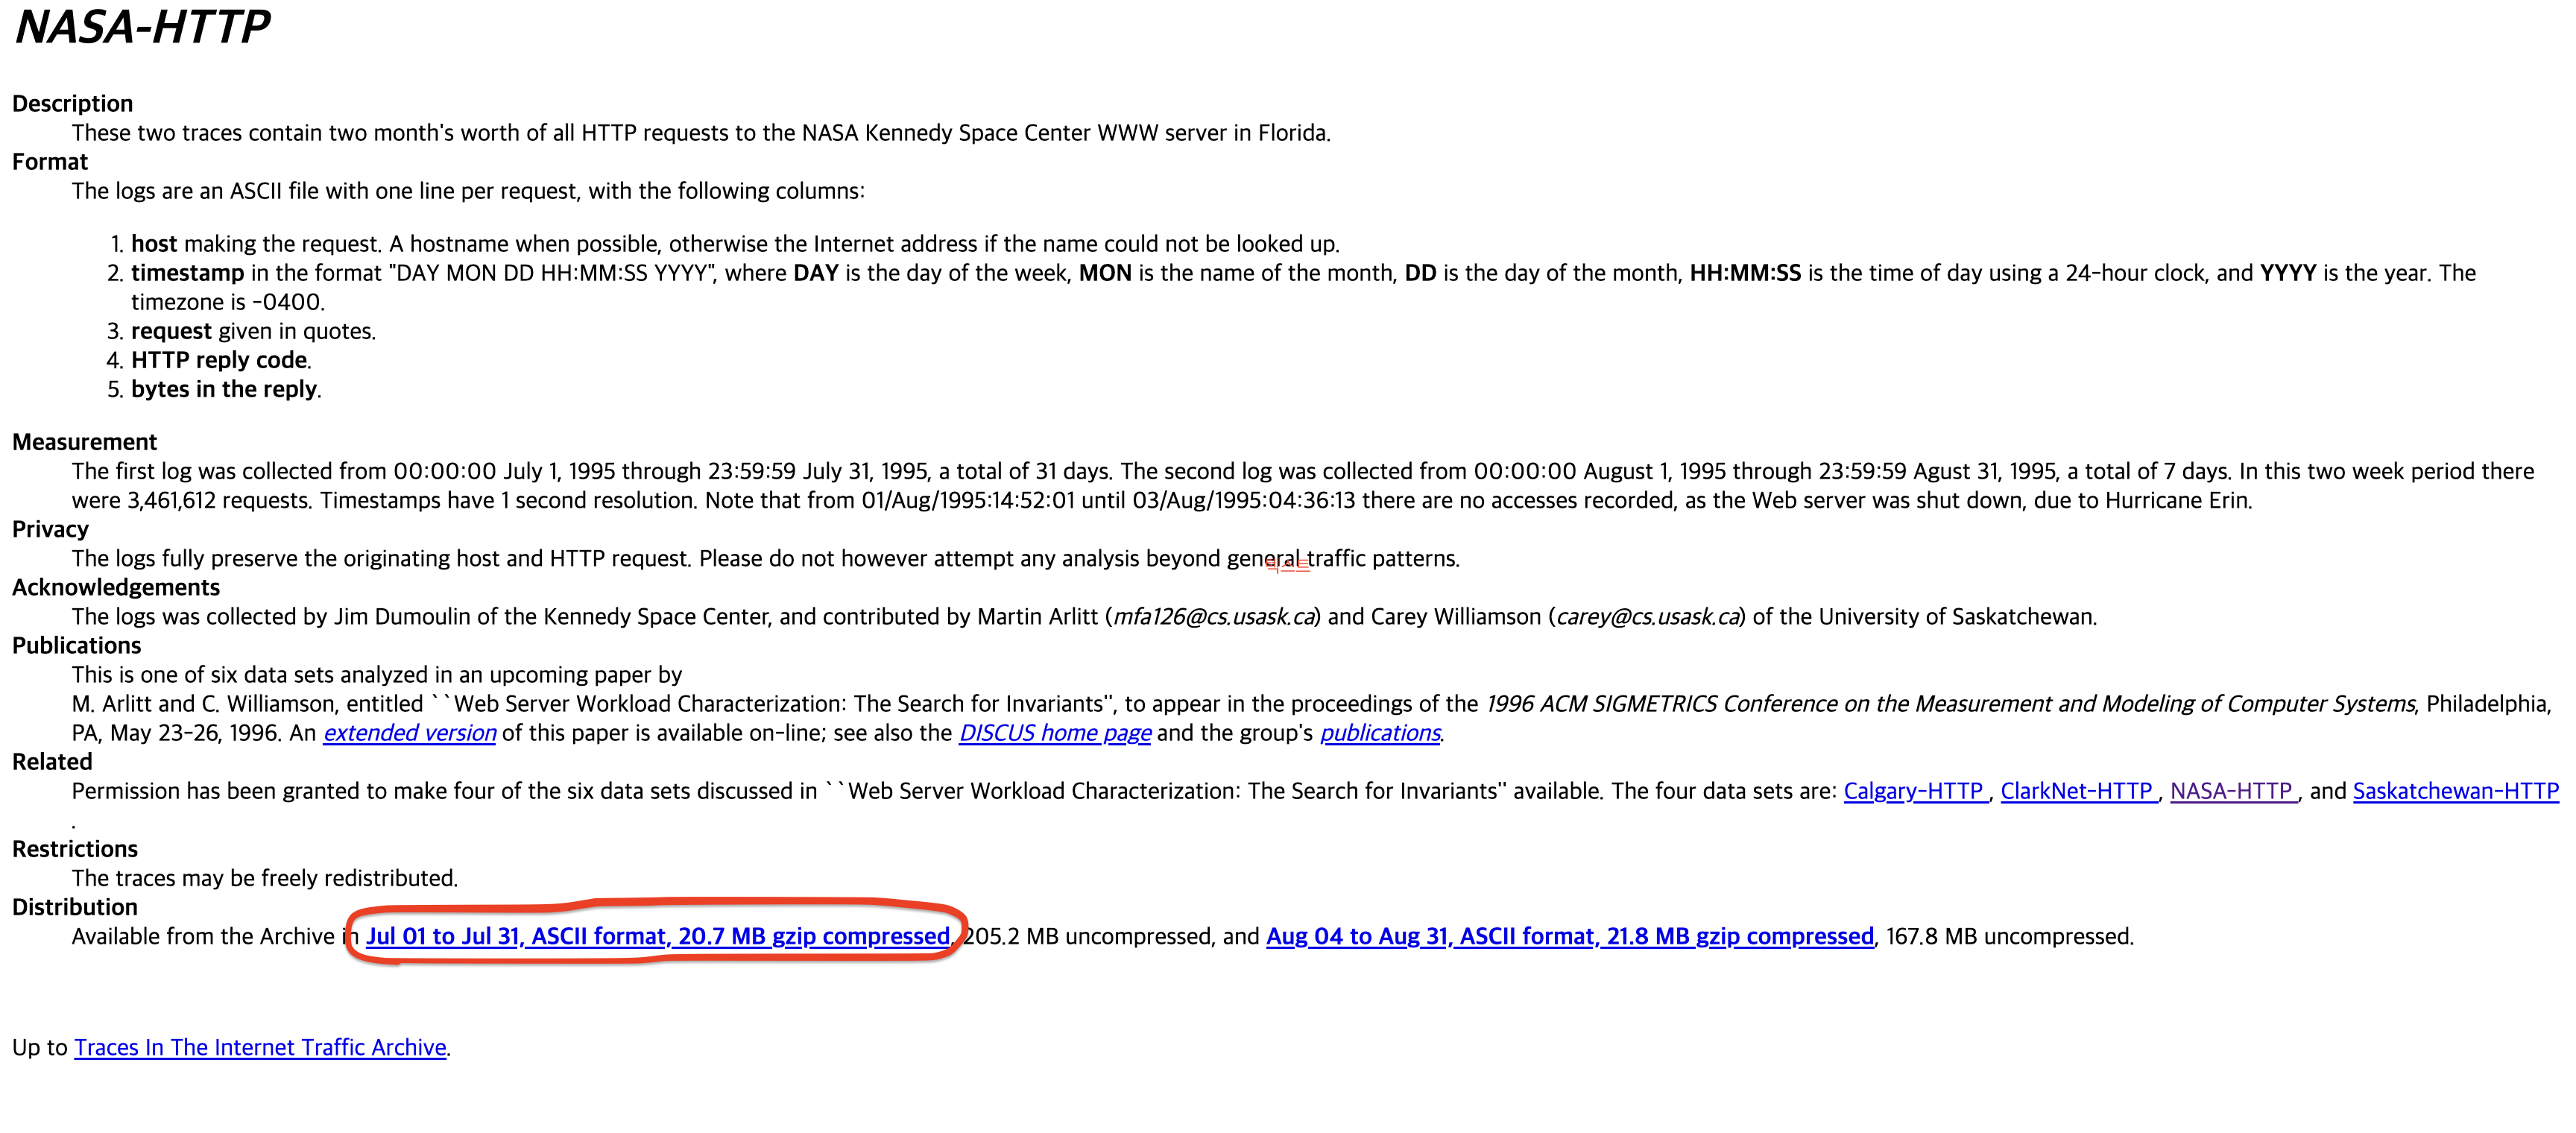


In [1]:
## 'rb'와 str()을 활용한 UnicodeDecodeError 해결코드

import re
import pandas as pd

pattern = re.compile('^\S+ \S+ \S+ \[(.*)\] "(.*)" (\S+) (\S+)$')

def parse_access_log(path):
    for line in open(path,'rb'):
        for m in pattern.finditer(str(line)):
            yield m.groups()

columns = ['time', 'request', 'status', 'bytes']
pd.DataFrame(parse_access_log('NASA_access_log_Jul95'), columns=columns)

,time,request,status,bytes
0,01/Jul/1995:00:00:01 -0400,GET /history/apollo/ HTTP/1.0,200,6245\n'
1,01/Jul/1995:00:00:06 -0400,GET /shuttle/countdown/ HTTP/1.0,200,3985\n'
2,01/Jul/1995:00:00:09 -0400,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085\n'
3,01/Jul/1995:00:00:11 -0400,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0\n'
4,01/Jul/1995:00:00:11 -0400,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179\n'
...,...,...,...,...
1891709,28/Jul/1995:13:32:22 -0400,GET /shuttle/technology/images/srb_mod_compare...,200,28219\n'
1891710,28/Jul/1995:13:32:23 -0400,GET /images/KSC-logosmall.gif HTTP/1.0,200,1204\n'
1891711,28/Jul/1995:13:32:23 -0400,GET /shuttle/missions/missions.html HTTP/1.0,200,8677\n'
1891712,28/Jul/1995:13:32:23 -0400,GET /images/ksclogo-medium.gif HTTP/1.0,200,5866\n'


In [2]:
## cp850으로 encoding하여 해결한 UnicodeDecodeError 해결코드

import re
import pandas as pd

pattern = re.compile('^\S+ \S+ \S+ \[(.*)\] "(.*)" (\S+) (\S+)$')

def parse_access_log(path):
    for line in open(path, encoding='cp850'):
        for m in pattern.finditer(line):
            yield m.groups()

columns = ['time', 'request', 'status', 'bytes']
pd.DataFrame(parse_access_log('NASA_access_log_Jul95'), columns=columns)

,time,request,status,bytes
0,01/Jul/1995:00:00:01 -0400,GET /history/apollo/ HTTP/1.0,200,6245
1,01/Jul/1995:00:00:06 -0400,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,01/Jul/1995:00:00:09 -0400,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,01/Jul/1995:00:00:11 -0400,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,01/Jul/1995:00:00:11 -0400,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...
1891709,28/Jul/1995:13:32:22 -0400,GET /shuttle/technology/images/srb_mod_compare...,200,28219
1891710,28/Jul/1995:13:32:23 -0400,GET /images/KSC-logosmall.gif HTTP/1.0,200,1204
1891711,28/Jul/1995:13:32:23 -0400,GET /shuttle/missions/missions.html HTTP/1.0,200,8677
1891712,28/Jul/1995:13:32:23 -0400,GET /images/ksclogo-medium.gif HTTP/1.0,200,5866


In [3]:
df = pd.DataFrame(parse_access_log('NASA_access_log_Jul95'), columns=columns)

In [4]:
df.time = pd.to_datetime(df.time, format='%d/%b/%Y:%X', exact=False)

In [5]:
df.head(2)

,time,request,status,bytes
0,1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245
1,1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985


In [6]:
df.to_csv('access_log.csv', index=False)

In [7]:
!head -3 access_log.csv

time,request,status,bytes
1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245
1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985
